## Vectors

A vector $\vec{v} \in \mathbb{R}^n$ is an $n$-tuple of real numbers. 
For example, consider a vector that has three components:  

$$
 \vec{v} = (v_1,v_2,v_3) \  \in \  (\mathbb{R},\mathbb{R},\mathbb{R}) \equiv \mathbb{R}^3.
$$

To specify the vector $\vec{v}$, 
we specify the values for its three components $v_1$, $v_2$, and $v_3$. 

A matrix $A \in \mathbb{R}^{m\times n}$ is a rectangular array of real numbers with $m$ rows and $n$ columns.
A vector is a special type of matrix; we can think of a vector $\vec{v}\in \mathbb{R}^n$
either as a row vector ($1\times n$ matrix) or a column vector ($n \times 1$ matrix).
Because of this equivalence between vectors and matrices,
there is no need for a special vector object in `SymPy`, 
and `Matrix` objects are used for vectors as well.

This is how we define vectors
and compute their properties:

In [137]:
u = Matrix([[4,5,6]])  # a row vector = 1x3 matrix
v = Matrix([[7],
            [8],       # a col vector = 3x1 matrix 
            [9]])

In [138]:
v.T                    # use the transpose operation to convert a col vec to a row vec

In [139]:
u[0]                   # 0-based indexing for entries

In [140]:
u.norm()               # length of u

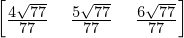

In [141]:
uhat = u/u.norm()      # unit-length vec in same dir as u
uhat

In [142]:
uhat.norm()

### Dot product

The dot product of the 3-vectors $\vec{u}$ and $\vec{v}$ can be defined two ways:

$$
  \vec{u}\cdot\vec{v}
  	\equiv 
	\underbrace{u_xv_x+u_yv_y+u_zv_z}_{\textrm{algebraic def.}} 
	\equiv 
	\underbrace{\|\vec{u}\|\|\vec{v}\|\cos(\varphi)}_{\textrm{geometric def.}} 
	\quad \in \mathbb{R},
$$

where $\varphi$ is the angle between the vectors $\vec{u}$ and $\vec{v}$.
In `SymPy`,

In [143]:
u = Matrix([ 4,5,6])
v = Matrix([-1,1,2])
u.dot(v)

We can combine the algebraic and geometric formulas for the dot product
to obtain the cosine of the angle between the vectors 

$$
    \cos(\varphi)
        = \frac{ \vec{u}\cdot\vec{v} }{  \|\vec{u}\|\|\vec{v}\| }
        = \frac{ u_xv_x+u_yv_y+u_zv_z  }{  \|\vec{u}\|\|\vec{v}\| },
$$

and use the `acos` function to find the angle measure:

In [144]:
acos(u.dot(v)/(u.norm()*v.norm())).evalf()  # in radians = 52.76 degrees

Just by looking at the coordinates of the vectors $\vec{u}$ and $\vec{v}$,
it's difficult to determine their relative direction. 
Thanks to the dot product, however,
we know the angle between the vectors is $52.76^\circ$,
which means they *kind of* point in the same direction.
Vectors that are at an angle $\varphi=90^\circ$ are called *orthogonal*, meaning at right angles with each other.
The dot product of vectors for which $\varphi > 90^\circ$ is negative because they point *mostly* in opposite directions.

The notion of the &ldquo;angle between vectors&rdquo; applies more generally to vectors with any number of dimensions.
The dot product for $n$-dimensional vectors is $\vec{u}\cdot\vec{v}=\sum_{i=1}^n u_iv_i$.
This means we can talk about &ldquo;the angle between&rdquo; 1000-dimensional vectors.
That's pretty crazy if you think about it&mdash;there is no way we could possibly &ldquo;visualize&rdquo; 1000-dimensional vectors,
yet given two such vectors we can tell if they point mostly in the same direction,
in perpendicular directions, or mostly in opposite directions. 

The dot product is a commutative operation $\vec{u}\cdot\vec{v} = \vec{v}\cdot\vec{u}$:

In [145]:
u.dot(v) == v.dot(u)

True

### Projections

Dot products are used for computing projections.
Assume you're given two vectors $\vec{u}$ and $\vec{n}$ and you want to find the component
of $\vec{u}$ that points in the $\vec{n}$ direction.
The following formula based on the dot product will give you the answer:

$$
 \Pi_{\vec{n}}( \vec{u} ) \equiv \frac{  \vec{u} \cdot \vec{n}  }{ \| \vec{n} \|^2 } \vec{n}.
$$

This is how to implement this formula in `SymPy`:

In [146]:
u = Matrix([4,5,6])
n = Matrix([1,1,1])
(u.dot(n) / n.norm()**2)*n  # projection of v in the n dir

In the case where the direction vector $\hat{n}$ is of unit length $\|\hat{n}\| = 1$,
the projection formula simplifies to $\Pi_{\hat{n}}( \vec{u} ) \equiv (\vec{u}\cdot\hat{n})\hat{n}$.

Consider now the plane $P$ defined by $(1,1,1)\cdot[(x,y,z)-(0,0,0)]=0$.
A plane is a two dimensional subspace of $\mathbb{R}^3$.
We can decompose any vector $\vec{u} \in \mathbb{R}^3$ into two parts $\vec{u}=\vec{v} + \vec{w}$
such that $\vec{v}$ lies inside the plane and $\vec{w}$ is perpendicular to the plane (parallel to $\vec{n}=(1,1,1)$).

To obtain the perpendicular-to-$P$ component of $\vec{u}$,
compute the projection of $\vec{u}$ in the direction $\vec{n}$:

In [147]:
w = (u.dot(n) / n.norm()**2)*n
w

To obtain the in-the-plane-$P$ component of $\vec{u}$,
start with $\vec{u}$ and subtract the perpendicular-to-$P$ part:

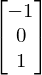

In [148]:
v = u - (u.dot(n)/n.norm()**2)*n  # same as u - w
v

You should check on your own that $\vec{v}+\vec{w}=\vec{u}$ as claimed.

### Cross product

The *cross product*, denoted $\times$, takes two vectors as inputs and produces a vector as output.
The cross products of individual basis elements are defined as follows:

$$
 \hat{\imath}\times\hat{\jmath} =\hat{k}, \qquad
 \hat{\jmath}\times\hat{k} =\hat{\imath}, \qquad
 \hat{k}\times \hat{\imath}= \hat{\jmath}.
$$

Here is how to compute the cross product of two vectors in `SymPy`:

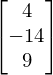

In [149]:
u = Matrix([ 4,5,6])
v = Matrix([-1,1,2])
u.cross(v)

The vector $\vec{u}\times \vec{v}$ is orthogonal to both $\vec{u}$ and $\vec{v}$.
The norm of the cross product  $\|\vec{u}\times \vec{v}\|$ is proportional to the lengths of the vectors 
and the sine of the angle between them:

In [150]:
(u.cross(v).norm()/(u.norm()*v.norm())).n()

The name &ldquo;cross product&rdquo; is well-suited for this operation since it is
calculated by &ldquo;cross-multiplying&rdquo; the coefficients of the vectors:

$$
   \vec{u}\times\vec{v}=
   \left( 
     u_yv_z-u_zv_y, \ u_zv_x-u_xv_z, \ u_xv_y-u_yv_x 
    \right).
$$

By defining individual symbols for the entries of two vectors,
we can make `SymPy` show us the cross-product formula:

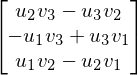

In [151]:
u1,u2,u3 = symbols('u1:4')
v1,v2,v3 = symbols('v1:4')
Matrix([u1,u2,u3]).cross(Matrix([v1,v2,v3]))

The dot product is anti-commutative $\vec{u}\times\vec{v} = -\vec{v}\times\vec{u}$:

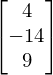

In [152]:
u.cross(v)

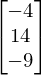

In [153]:
v.cross(u)

The product of two numbers and the dot product of two vectors are commutative operations.
The cross product, however, is not commutative: $\vec{u}\times\vec{v} \neq \vec{v}\times\vec{u}$.